# Rice Leaf Disease using CNN

## PROJECT CODE: PRCP-1001-RiceLeaf



### The dataset contains images of rice leaf. There are three classes/diseases: Bacterial leaf blight, Brown spot, and Leaf smut, each having 40 images. The target is to create a model that predicts the disease of the rice leaf.

## Installing the required libraries

In [1]:
# Open-source Artificial Neural Networks Library

!pip install keras

# Open-source Deep Neural Networks Library 

!pip install tensorflow

# Open-source Computer Vision Library

!pip install opencv-python

## Importing the required packages

In [2]:
# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Libraries for loading the image

import cv2
import os

# Libraries for model selection

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Libraries for CNN

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

## Loading the images

In [3]:
# Function to load all the images from folder

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [4]:
# Calling the function

img_bl = load_images_from_folder("Bacterial leaf blight")
img_bs = load_images_from_folder("Brown spot")
img_ls = load_images_from_folder("Leaf smut")

## Checking the images

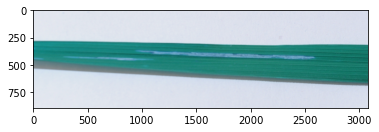

In [5]:
# Bacterial leaf blight

plt.imshow(img_bl[10])

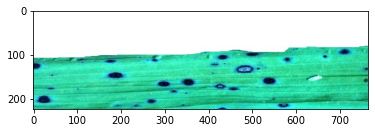

In [6]:
# Brown spot

plt.imshow(img_bs[20])

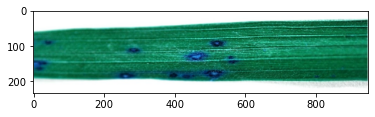

In [7]:
# Leaf smut

plt.imshow(img_ls[35])

## Checking the size

In [8]:
len(img_bl)

40

### There are 40 images for Bacterial leaf blight.

In [9]:
len(img_bs)

40

### There are 40 images for Brown spot.

In [10]:
len(img_ls)

39

### There are 40 images for Leaf smut.

# PREPROCESSING

## For Independent variable

In [11]:
X = img_bl+img_bs+img_ls
len(X)

119

## Checking image shape

In [12]:
i = 0

while i<=10:

    h, w, c = X[i].shape
    print('width:  ', w)
    print('height: ', h)
    print('channel:', c)
    i = i+1

width:   3081
height:  897
channel: 3
width:   3081
height:  897
channel: 3
width:   3081
height:  897
channel: 3
width:   3081
height:  897
channel: 3
width:   3081
height:  897
channel: 3
width:   3081
height:  897
channel: 3
width:   3081
height:  897
channel: 3
width:   3081
height:  897
channel: 3
width:   3081
height:  897
channel: 3
width:   3081
height:  897
channel: 3
width:   3081
height:  897
channel: 3


## For Target

#### Bacterial leaf blight

In [13]:
bl = []
i = 1
while i<=40:
    bl.append(0)
    i = i+1

In [14]:
len(bl)

40

#### Brown spot

In [15]:
bs = []
j = 1
while j<=40:
    bs.append(1)
    j = j+1

In [16]:
len(bs)

40

#### Leaf smut

In [17]:
ls = []
k = 1
while k<=39:
    ls.append(2)
    k = k+1

In [18]:
len(ls)

39

#### y

In [19]:
y = bl+bs+ls
len(y)

119

## Splitting into training and testing data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=23)

## Converting to numpy array

In [21]:
x_train = np.array(x_train)

<ipython-input-21-3d41624a13f9>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array(x_train)


In [22]:
x_test = np.array(x_test)

<ipython-input-22-732828b5fbc2>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test = np.array(x_test)


In [23]:
y_train = np.array(y_train)

In [24]:
y_test = np.array(y_test)

## Scaling

In [25]:
x_train = x_train/255
x_test = x_test/255

In [26]:
x_train[10].shape

(897, 3081, 3)

## Reshape the image

In [27]:
x_train.shape

(83,)

In [28]:
x_train = np.resize(x_train, (83,255,255,3))

In [29]:
x_train.shape

(83, 255, 255, 3)

## One hot encoding

In [30]:
y_train.shape

(83,)

In [31]:
y_categorical_train = to_categorical(y_train,10) #one hot encoder
y_categorical_train.shape

(83, 10)

# MODEL BUILDING

## CNN

In [32]:
# Defining the model

model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(255, 255, 3), activation='relu',))

# POOLING LAYER

model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER

model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu',))

# POOLING LAYER

model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER

model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)

model.add(Dense(256, activation='relu')) 

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES

model.add(Dense(3, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 64)      3136      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 123, 123, 32)      32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 119072)            0         
                                                                 
 dense (Dense)               (None, 256)               3

In [ ]:
x_train= list(x_train)
y_train= list(y_train)
data_set = tf.data.Dataset.from_tensor_slices(  (x_train ,y_train) )
model.fit(data_set)

In [ ]:
model.fit(X,verbose=1,epochs=5)